# Time Series Analysis Project
## Avik Das (MDS202112)
## Meghna Mondal (MDS202123)

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from pandas import read_csv
from keras.layers import Dense
from keras.models import Sequential
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima --quiet
import pmdarima as pm

In [ ]:
df_cur = pd.read_csv("/content/drive/MyDrive/euro-daily-hist_1999_2022.csv", parse_dates=["Period\\Unit:"])
df_cur.sample(5)

Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
3189   2010-08-27               1.4322           1.9558            2.2380   
5154   2003-02-14               1.8186           1.9527            3.9622   
1321   2017-11-30               1.5659           1.9558            3.8668   
4469   2005-09-30               1.5828           1.9559            2.6722   
4031   2007-06-06               1.6053           1.9558            2.6427   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
3189             1.3487         1.3004                   8.6426   
5154             1.6393         1.4692                   8.9334   
1321             1.5267         1.1699                   7.8377   
4469             1.4063         1.5561                   9.7444   
4031             1.4341         1.6452                  10.3183   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
3189              NaN          24.755          7.4481  ...          4.2435   
5154          0.58028          31.387          7.4318  ...          3.5217   
1321              NaN          25.491          7.4417  ...          4.6475   
4469          0.57320          29.553          7.4624  ...          3.5603   
4031          0.58320          28.433          7.4467  ...          3.2668   

     [Russian rouble ] [Swedish krona ] [Singapore dollar ]  \
3189           39.0700           9.3745              1.7255   
5154           34.1812           9.1066              1.8929   
1321           69.1940           9.9208              1.5986   
4469           34.3340           9.3267              2.0353   
4031           34.8990           9.3400              2.0696   

     [Slovenian tolar ] [Slovak koruna ] [Thai baht ] [Turkish lira ]  \
3189                NaN              NaN      39.8400          1.9383   
5154           231.2224           41.972      46.5674          1.7950   
1321                NaN              NaN      38.6430          4.6638   
4469           239.5200           38.790      49.4400          1.6230   
4031                NaN           34.215      44.2080          1.7850   

     [US dollar ]  [South African rand ]  
3189       1.2713                 9.3771  
5154       1.0793                 9.0055  
1321       1.1849                16.1263  
4469       1.2042                 7.6765  
4031       1.3513                 9.7390  

[5 rows x 41 columns]

In [ ]:
df = df_cur[ ['Period\\Unit:' , '[Indian rupee ]'] ] 

In [ ]:
df.columns=['Date','Rupees']

In [ ]:
df.head()

Date   Rupees
0 2023-01-27  88.6720
1 2023-01-26  88.8255
2 2023-01-25  88.7258
3 2023-01-24  88.6235
4 2023-01-23  88.4520

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6229 non-null   datetime64[ns]
 1   Rupees  5961 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 97.5+ KB


In [ ]:
df[df['Rupees']=='-']['Date'].min()

Timestamp('2000-04-21 00:00:00')

In [ ]:
df[df['Rupees']=='-']['Date'].max()

Timestamp('2012-05-01 00:00:00')

<Axes: xlabel='Date'>

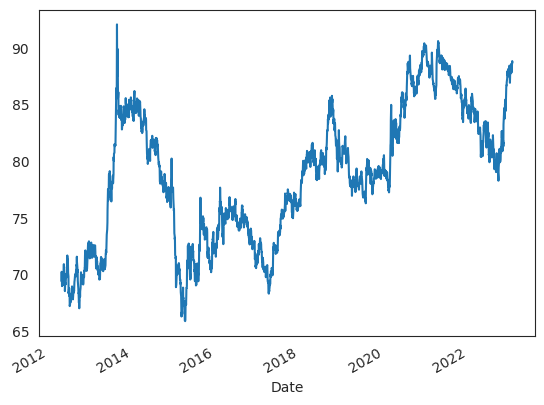

In [ ]:
df = df[ df['Date'] > '2012-05-01 00:00:00']
df['Rupees'] = df['Rupees'].astype(np.number)
df.set_index('Date', inplace = True)
df['Rupees'].plot()

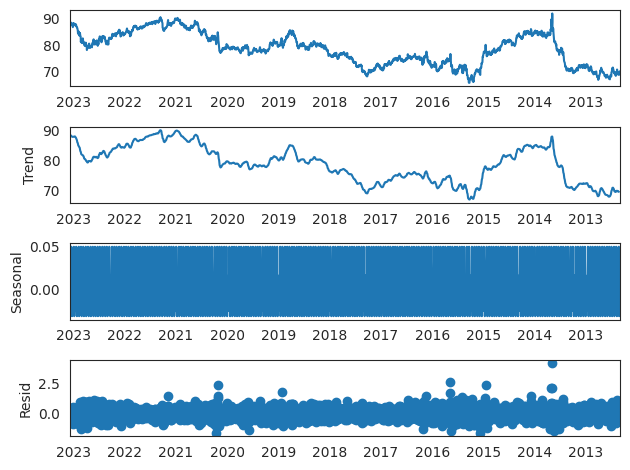

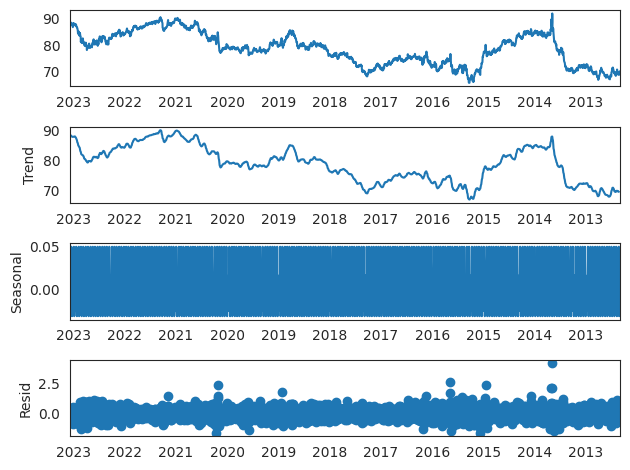

In [ ]:
# Checking for presence of Trend and Seasonality
decompose_data = seasonal_decompose(df, period = 12)
decompose_data.plot()

In [ ]:
df.describe()

Rupees
count  2752.000000
mean     78.714922
std       6.009258
min      65.867100
25%      73.581800
50%      78.925650
75%      83.826375
max      92.065000

<Axes: xlabel='Date'>

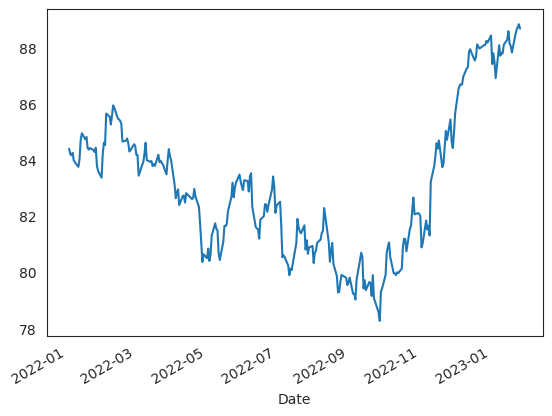

In [ ]:
df22 = df[ df.index > '2022-01-02 00:00:00']
df22['Rupees'].plot()

<Axes: xlabel='Date'>

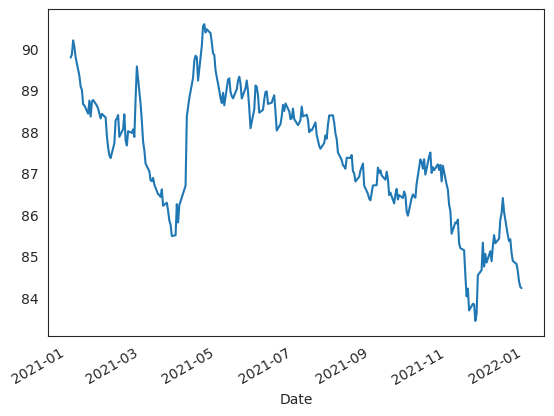

In [ ]:
df21 = df[df.index > '2021-01-01 00:00:00']
df21 = df21['2022-01-02 00:00:00' > df21.index]
df21['Rupees'].plot()

<Axes: xlabel='Date'>

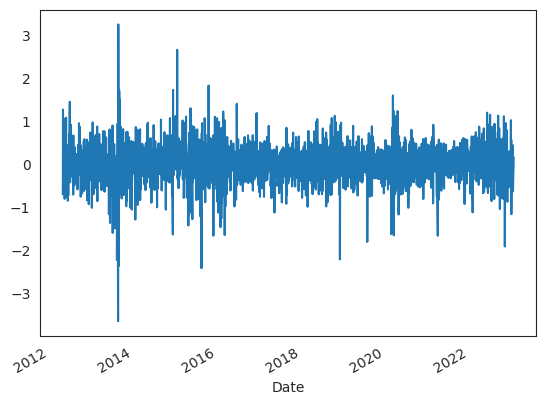

In [ ]:
df['Rupees_diff'] = df['Rupees'].diff()
df['Rupees_diff'].plot()

<Axes: xlabel='Date'>

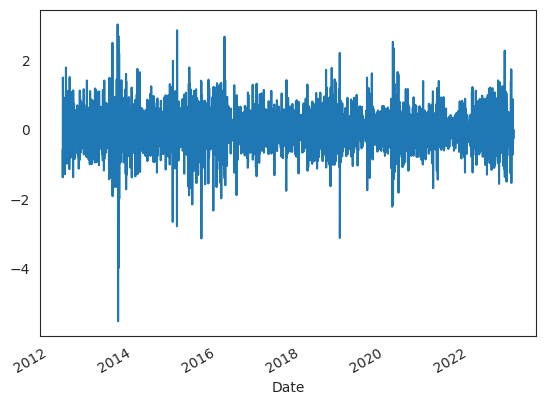

In [ ]:
df['Rupees_diff2'] = df['Rupees_diff'].diff()
df['Rupees_diff2'].plot()

In [ ]:
df.dropna(axis=0,inplace=True)

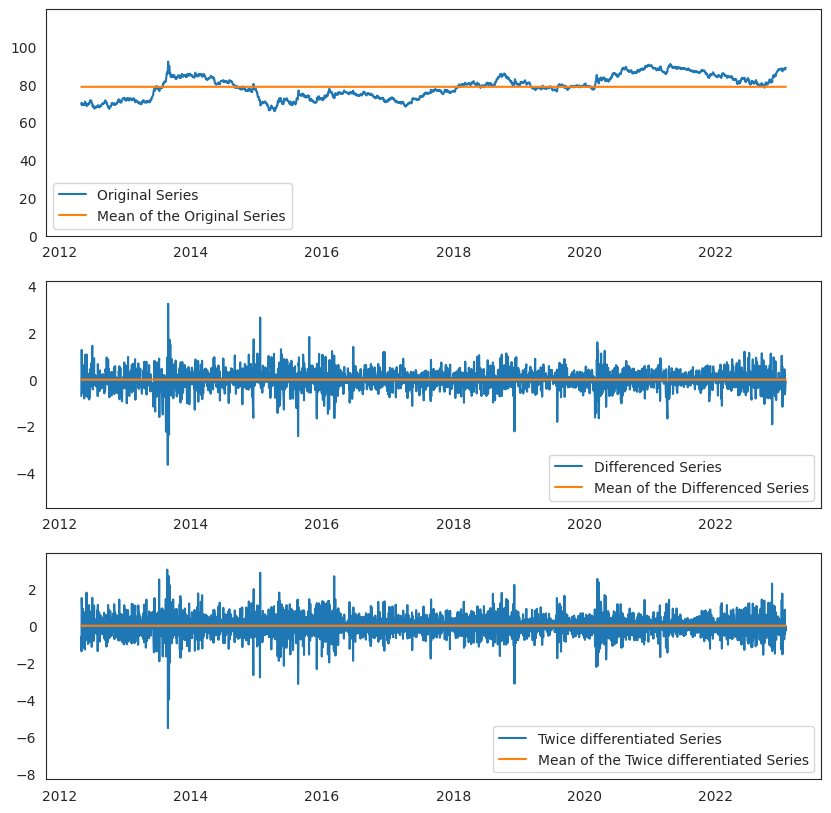

In [ ]:
y = df["Rupees"]
df['Rupees_mean'] = df['Rupees'].mean()
y_bar = df['Rupees_mean']

y_diff = df["Rupees_diff"]
df['Rupees_diff_mean'] = df['Rupees_diff'].mean()
y_diff_bar = df['Rupees_diff_mean']

y_diff2 = df["Rupees_diff2"]
df['Rupees_diff2_mean'] = df['Rupees_diff2'].mean()
y_diff2_bar = df['Rupees_diff2_mean']

x = df.index
fig = plt.figure(figsize = (10, 10))
ax1, ax2, ax3 = fig.subplots(3, 1)

ax1.plot(x, y, label = "Original Series")
ax1.plot(x, y_bar, label = "Mean of the Original Series")
ax1.set_ylim(0, np.max(y)*1.3)
ax1.legend(loc = "lower left")

ax2.plot(x, y_diff, label = "Differenced Series")
ax2.plot(x, y_diff_bar, label = "Mean of the Differenced Series")
ax2.set_ylim(np.min(y_diff)*1.5, np.max(y_diff)*1.3)
ax2.legend(loc = "lower right")

ax3.plot(x, y_diff2, label = "Twice differentiated Series")
ax3.plot(x, y_diff2_bar, label = "Mean of the Twice differentiated Series")
ax3.set_ylim(np.min(y_diff2)*1.5, np.max(y_diff2)*1.3)
ax3.legend(loc = "lower right")

In [ ]:
for series, name_series in zip([y, y_diff, y_diff2], ["Original Series", "Differenced Series", "Twice differentiated Series"]):
    
    print("------------------------------------------------------------------")
    
    print("We are working with the series {}\n".format(name_series))
    result_analysis = adfuller(series)
    
    adf = result_analysis[0]
    p_value = result_analysis[1]
    
    print("statistical value of ADF of the precomputed tables: {}".format(-2.867))
    print("statistical value of ADF: {}\n".format(adf))
    
    print("Level of significance to take the series as stationary: {}".format(0.05))
    print("p-value: {}\n".format(p_value))

------------------------------------------------------------------
We are working with the series Original Series

statistical value of ADF of the precomputed tables: -2.867
statistical value of ADF: -1.8663913943871575

Level of significance to take the series as stationary: 0.05
p-value: 0.34803300847644647

------------------------------------------------------------------
We are working with the series Differenced Series

statistical value of ADF of the precomputed tables: -2.867
statistical value of ADF: -18.19639074730369

Level of significance to take the series as stationary: 0.05
p-value: 2.4120338625318466e-30

------------------------------------------------------------------
We are working with the series Twice differentiated Series

statistical value of ADF of the precomputed tables: -2.867
statistical value of ADF: -16.57263577818456

Level of significance to take the series as stationary: 0.05
p-value: 1.864356798871206e-29



/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


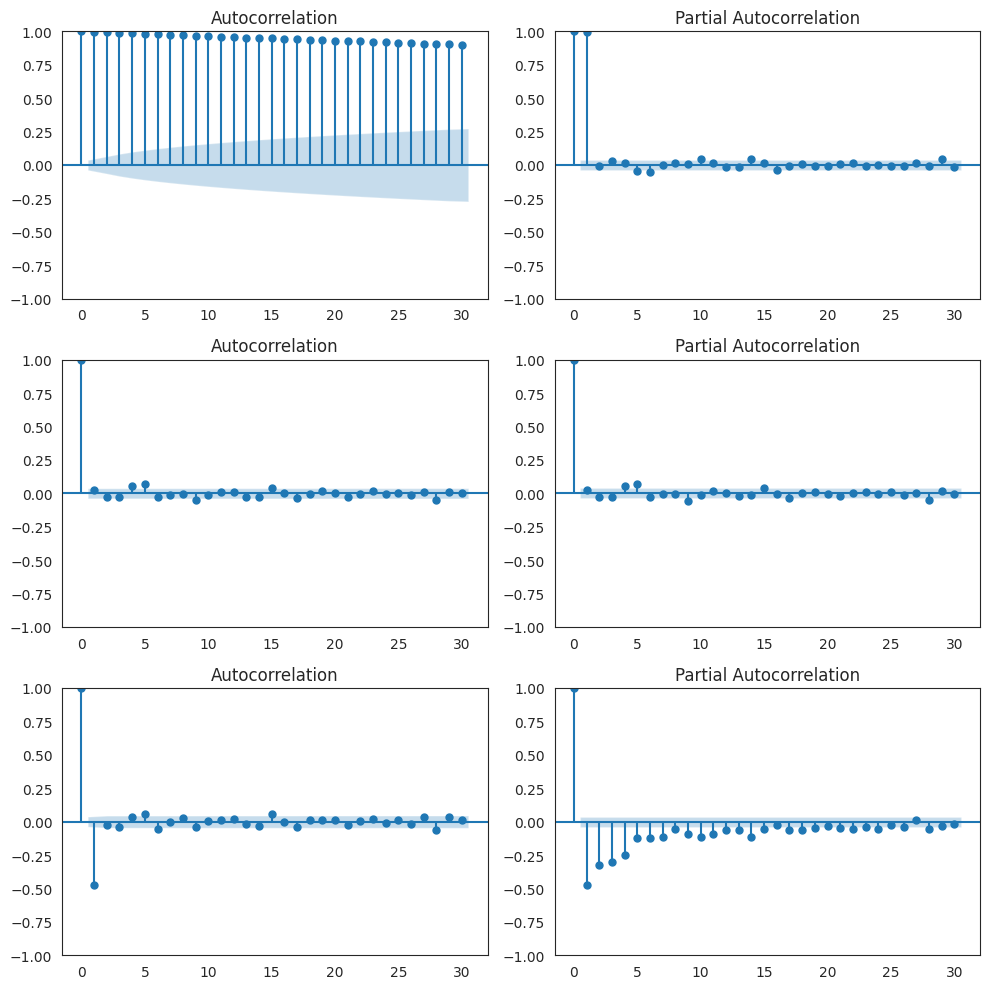

In [ ]:
Lags = 30

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6)) = fig.subplots(3, 2)

# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = Lags, title = "Autocorrelation")
plot_pacf(y, ax = ax2, lags = Lags, title = "Partial Autocorrelation")

plot_acf(y_diff, ax = ax3, lags = Lags, title = "Autocorrelation")
plot_pacf(y_diff, ax = ax4, lags = Lags, title = "Partial Autocorrelation")

plot_acf(y_diff2, ax = ax5, lags = Lags, title = "Autocorrelation")
plot_pacf(y_diff2, ax = ax6, lags = Lags, title = "Partial Autocorrelation")

fig.tight_layout()

In [ ]:
ARIMA_model = pm.auto_arima(df['Rupees_diff2'], 
                      start_p=0, 
                      start_q=0,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=20, max_q=10, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

In [ ]:
ARIMA_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (15, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [ ]:
data_set_frame = df
column_headers = data_set_frame.columns.values.tolist()
currency_index = column_headers.index('Rupees') + 1
data_file = df
# the type of data_file is a matrix, as returned by pandas
raw_data = []  # need to convert a matrix values to a simple list of values
for data_point in data_file.values.tolist():
    raw_data.append(data_point[0])
LENGTH_DATA_SET = len(raw_data)

In [ ]:
Raw_data = raw_data.copy()

In [ ]:
Raw_data.reverse()
Raw_data

[69.404,
 70.11,
 70.223,
 68.958,
 69.1875,
 69.768,
 69.131,
 69.425,
 69.415,
 69.05,
 69.416,
 69.098,
 69.288,
 70.1,
 70.664,
 70.897,
 69.842,
 69.516,
 69.345,
 69.722,
 69.942,
 69.593,
 68.519,
 69.231,
 69.161,
 69.123,
 69.203,
 69.154,
 69.927,
 69.712,
 69.689,
 70.053,
 69.798,
 70.654,
 70.607,
 71.339,
 71.338,
 71.663,
 71.2,
 71.126,
 71.293,
 70.603,
 70.12,
 69.818,
 68.373,
 68.436,
 68.284,
 68.71,
 68.761,
 68.077,
 68.2,
 68.105,
 67.194,
 67.37,
 67.601,
 67.828,
 67.634,
 67.533,
 67.756,
 67.843,
 68.145,
 68.074,
 68.156,
 68.069,
 68.367,
 68.222,
 68.934,
 68.272,
 68.737,
 68.484,
 68.36,
 68.018,
 67.79,
 68.289,
 68.751,
 68.36,
 68.486,
 68.736,
 68.51,
 68.845,
 69.076,
 69.356,
 69.395,
 69.77,
 69.861,
 69.788,
 69.787,
 70.026,
 69.796,
 70.016,
 70.3,
 70.349,
 70.245,
 70.837,
 70.744,
 71.223,
 71.557,
 71.114,
 70.736,
 70.524,
 70.204,
 70.3866,
 69.44,
 69.068,
 68.947,
 68.74,
 68.329,
 68.348,
 67.487,
 67.747,
 67.443,
 67.002,
 67.422,
 

In [ ]:
TRAINING_PERCENTAGE = 0.7
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
NUMBER_OF_PREDICTED_DATA_POINTS = 10
TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * TRAINING_PERCENTAGE)
TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
training_set, testing_set = Raw_data[0:TRAINING_SET_LENGTH], Raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]

In [ ]:
def plot_arima(testing_actual, testing_predict, file_name):
    actual = plt.plot(testing_actual, label="Actual data points", color="blue")
    testing = plt.plot(testing_predict, label="Testing prediction", color="hotpink")

    plt.ylabel('currency values for 1 EURO')
    plt.xlabel('number of days')
    plt.title('EURO/INR : actual vs predicted using ARIMA')

    plt.legend()
    plt.show()
    plt.savefig(file_name)
    plt.clf()

In [ ]:
def plot_forecast(testing_actual, testing_predict, file_name, label):
    actual = plt.plot(testing_actual, label="Actual data points", color="blue")
    testing = plt.plot(testing_predict, label="Testing prediction", color="hotpink")

    plt.ylabel('currency values for 1 EURO')
    plt.xlabel('number of days')
    plt.title(f'EURO/INR : actual vs predicted using {label}')

    plt.legend()
    plt.show()
    plt.savefig(file_name)
    plt.clf()

In [ ]:
testing_predict_arima_dict = {}
def arima_pred(NUMBER_OF_PREDICTED_DATA_POINTS):
  #prediction
  testing_predict_arima = []
  training_predict = list(training_set)

  for testing_set_index in range(0, TESTING_SET_LENGTH, NUMBER_OF_PREDICTED_DATA_POINTS):
      arima = ARIMA(training_predict, order=(15, 2, 0))
      arima_model = arima.fit()
      n = TESTING_SET_LENGTH - testing_set_index
      forecasting = arima_model.forecast(steps = min(NUMBER_OF_PREDICTED_DATA_POINTS,n)).tolist()
      testing_predict_arima = testing_predict_arima + forecasting
      training_predict = training_predict + testing_set[testing_set_index:testing_set_index+min(NUMBER_OF_PREDICTED_DATA_POINTS,n)]
  print('prediction done...')
  print('evaluating performance...')
  testing_actual = testing_set
  mse_arima = mean_squared_error(testing_actual, testing_predict_arima)
  R2_arima = r2_score(testing_actual, testing_predict_arima)
  print('\t Testing Mean Square Error:', mse_arima)
  print('\t Testing R-Square Error:', R2_arima)

  with open(f"mse_arima{NUMBER_OF_PREDICTED_DATA_POINTS}.txt", 'w') as mse_file:
      mse_file.write(str(mse_arima) + '\n')

  print(f'plotting the graph for prediction on next {NUMBER_OF_PREDICTED_DATA_POINTS} days...')
  plot_arima(testing_actual, testing_predict_arima, f"testing_prediction{NUMBER_OF_PREDICTED_DATA_POINTS}_arima.pdf")

  #forecasting
  arima = ARIMA(Raw_data, order=(15, 2, 0))
  arima_model = arima.fit()
  forecasting = arima_model.forecast(steps = NUMBER_OF_PREDICTED_DATA_POINTS).tolist()
  extended_raw_data = Raw_data[-100:] + [None]*NUMBER_OF_PREDICTED_DATA_POINTS
  extended_forecasted_data = [None]*99 + [Raw_data[-1]] + forecasting
  print(f'plotting the graph of forecasting for next {NUMBER_OF_PREDICTED_DATA_POINTS} days...')
  plot_forecast(extended_raw_data, extended_forecasted_data, f"testing_forecasting{NUMBER_OF_PREDICTED_DATA_POINTS}_arima.pdf", 'ARIMA')

  testing_predict_arima_dict[NUMBER_OF_PREDICTED_DATA_POINTS] = testing_predict_arima

prediction done...
evaluating performance...
	 Testing Mean Square Error: 0.5719480434296469
	 Testing R-Square Error: 0.9499215744964976
plotting the graph for prediction on next 5 days...


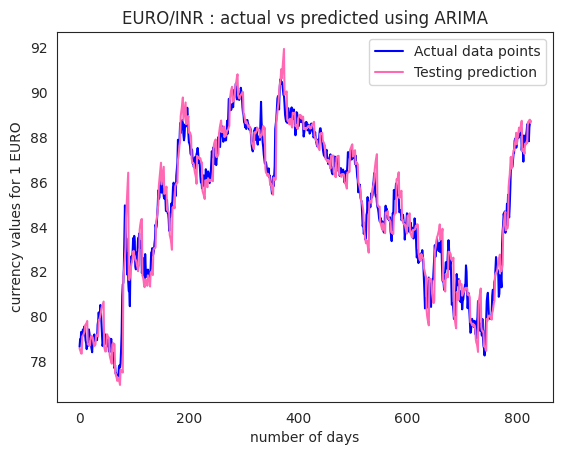

plotting the graph of forecasting for next 5 days...


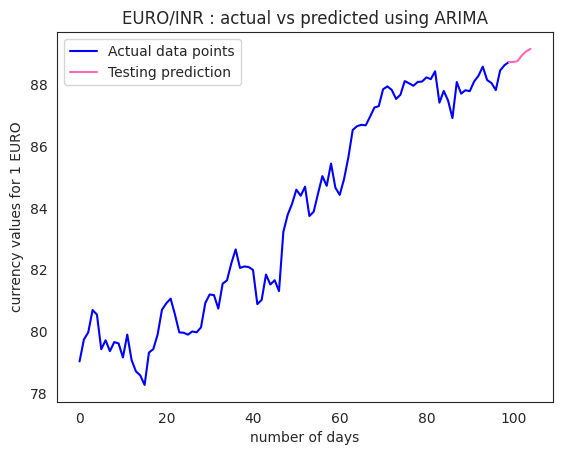

prediction done...
evaluating performance...
	 Testing Mean Square Error: 1.1205528582635387
	 Testing R-Square Error: 0.9018870271873045
plotting the graph for prediction on next 10 days...


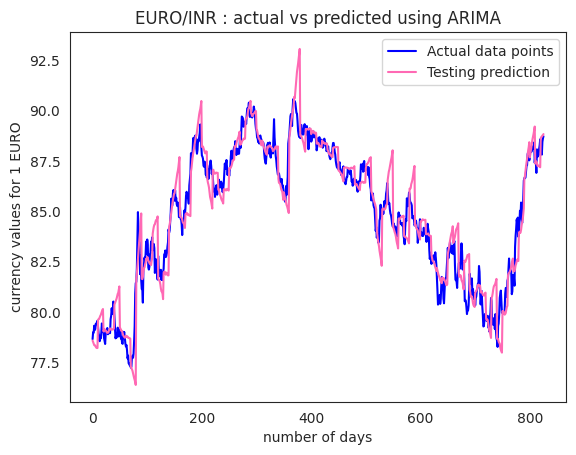

plotting the graph of forecasting for next 10 days...


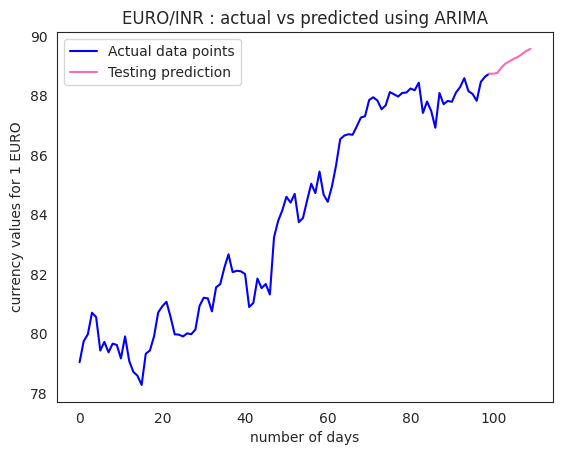

prediction done...
evaluating performance...
	 Testing Mean Square Error: 2.3099408751831105
	 Testing R-Square Error: 0.7977470097778527
plotting the graph for prediction on next 15 days...


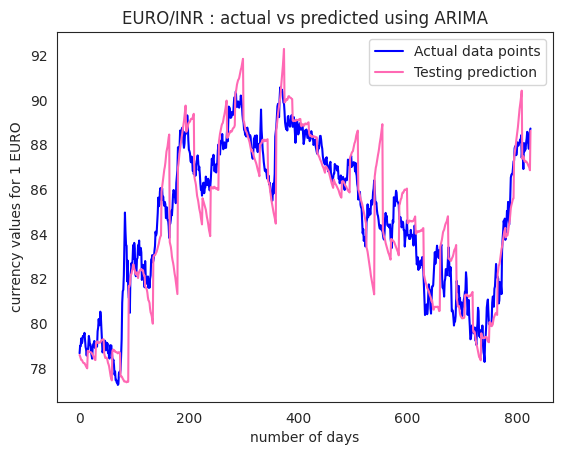

plotting the graph of forecasting for next 15 days...


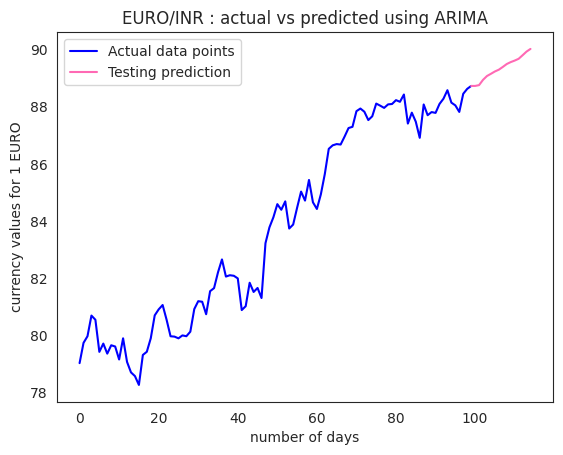

prediction done...
evaluating performance...
	 Testing Mean Square Error: 2.872336765520261
	 Testing R-Square Error: 0.7485049483331767
plotting the graph for prediction on next 20 days...


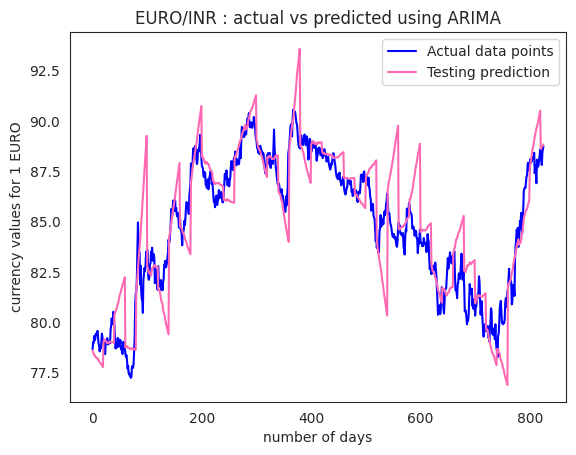

plotting the graph of forecasting for next 20 days...


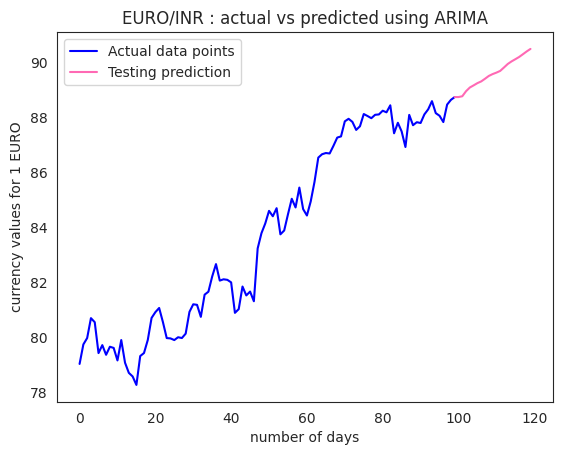

<Figure size 640x480 with 0 Axes>

In [ ]:
NUMBER_OF_PREDICTED_DATA_POINTS_LIST = [5,10,15,20]
for i in NUMBER_OF_PREDICTED_DATA_POINTS_LIST:
  arima_pred(i)

## RNN

In [ ]:
data_set_frame = df
column_headers = data_set_frame.columns.values.tolist()
currency_index = column_headers.index('Rupees') + 1
data_file = df
# the type of data_file is a matrix, as returned by pandas
raw_data = []  # need to convert a matrix values to a simple list of values
for data_point in data_file.values.tolist():
    raw_data.append(data_point[0])
LENGTH_DATA_SET = len(raw_data)

In [ ]:
Raw_data = raw_data.copy()
Raw_data.reverse()

In [ ]:
TRAINING_PERCENTAGE = 0.7
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
NUMBER_OF_PREVIOUS_DATA_POINTS = 30
NUMBER_OF_PREDICTED_DATA_POINTS = 10

np.random.seed(42)

TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * TRAINING_PERCENTAGE)
TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
training_set, testing_set = Raw_data[0:TRAINING_SET_LENGTH], Raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]

In [ ]:
def plot_rnn(test_predict, testing_predict, file_name, day_number):
    actual_data = [test_predict[i][day_number] for i in range(len(test_predict))]
    testing_data = [testing_predict[i][day_number] for i in range(len(testing_predict))]

    actual = plt.plot(actual_data, label="Actual data points", color="blue")
    testing = plt.plot(testing_data, label="Testing prediction", color="red")

    plt.ylabel('INR values for 1 EURO')
    plt.xlabel('number of days')
    plt.title(f'EURO/INR: actual vs predicted using RNN for day number {day_number+1} forecasting')

    plt.legend()
    plt.show()
    plt.savefig(file_name)
    plt.clf()

In [ ]:
testing_predict_rnn_dict = {}
def rnn_pred(NUMBER_OF_PREDICTED_DATA_POINTS):
  data_set_frame = df
  column_headers = data_set_frame.columns.values.tolist()
  currency_index = column_headers.index('Rupees') + 1
  data_file = df
  # the type of data_file is a matrix, as returned by pandas
  raw_data = []  # need to convert a matrix values to a simple list of values
  for data_point in data_file.values.tolist():
      raw_data.append(data_point[0])
  LENGTH_DATA_SET = len(raw_data)

  Raw_data = raw_data.copy()
  Raw_data.reverse()

  TRAINING_PERCENTAGE = 0.7
  TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
  NUMBER_OF_PREVIOUS_DATA_POINTS = 30
  NUMBER_OF_PREDICTED_DATA_POINTS = NUMBER_OF_PREDICTED_DATA_POINTS

  np.random.seed(42)

  TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * TRAINING_PERCENTAGE)
  TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
  training_set, testing_set = Raw_data[0:TRAINING_SET_LENGTH], Raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]

  train_actual = []
  train_predict = []
  for interval in range(len(training_set) - NUMBER_OF_PREVIOUS_DATA_POINTS - NUMBER_OF_PREDICTED_DATA_POINTS):
      n = interval + NUMBER_OF_PREVIOUS_DATA_POINTS
      train_actual.append(training_set[interval: n])
      train_predict.append(training_set[n : n + NUMBER_OF_PREDICTED_DATA_POINTS])

  test_actual = []
  test_predict = []
  for interval in range(len(testing_set) - NUMBER_OF_PREVIOUS_DATA_POINTS - NUMBER_OF_PREDICTED_DATA_POINTS):
      n = interval + NUMBER_OF_PREVIOUS_DATA_POINTS
      test_actual.append(testing_set[interval: n])
      test_predict.append(testing_set[n : n + NUMBER_OF_PREDICTED_DATA_POINTS])

  recurrent_neural_network = Sequential()

  recurrent_neural_network.add(Dense(30, input_dim = NUMBER_OF_PREVIOUS_DATA_POINTS, activation = "relu"))
  recurrent_neural_network.add(Dense(20, activation = "relu"))
  recurrent_neural_network.add(Dense(NUMBER_OF_PREDICTED_DATA_POINTS))

  recurrent_neural_network.compile(loss = 'mean_squared_error', optimizer = 'adam')
  recurrent_neural_network.fit(train_actual, train_predict, epochs = 50, batch_size = 2, verbose = 2)

  training_predict = recurrent_neural_network.predict(train_actual)
  testing_predict = recurrent_neural_network.predict(test_actual)
  
  recurrent_neural_network.summary()

  mse_testing = recurrent_neural_network.evaluate(test_actual, test_predict, verbose=0)
  print('\t Testing Mean Square Error:', mse_testing)

  with open(f"mse_rnn_{NUMBER_OF_PREDICTED_DATA_POINTS}.txt", 'w') as mse_file:
      mse_file.write(str(mse_testing) + '\n')
  
  print('plotting the graph...')
  for i in range(NUMBER_OF_PREDICTED_DATA_POINTS):
      plot_rnn(test_predict, testing_predict, "testing_prediction_rnn.pdf", i)

  tmp = recurrent_neural_network.predict([testing_set[-30:]])
  
  for i in tmp.tolist():
    forecasting = i
  extended_raw_data = Raw_data[-100:] + [None]*NUMBER_OF_PREDICTED_DATA_POINTS
  extended_forecasted_data = [None]*99 + [Raw_data[-1]] + forecasting
  print(f'plotting the graph of forecasting for next {NUMBER_OF_PREDICTED_DATA_POINTS} days...')
  plot_forecast(extended_raw_data, extended_forecasted_data, f"testing_forecasting{NUMBER_OF_PREDICTED_DATA_POINTS}_rnn.pdf", "RNN")

  testing_predict_rnn_dict[NUMBER_OF_PREDICTED_DATA_POINTS] = testing_predict

Epoch 1/50
945/945 - 2s - loss: 149.1718 - 2s/epoch - 2ms/step
Epoch 2/50
945/945 - 1s - loss: 2.8220 - 1s/epoch - 1ms/step
Epoch 3/50
945/945 - 2s - loss: 2.7112 - 2s/epoch - 2ms/step
Epoch 4/50
945/945 - 2s - loss: 2.6775 - 2s/epoch - 2ms/step
Epoch 5/50
945/945 - 1s - loss: 2.3984 - 1s/epoch - 1ms/step
Epoch 6/50
945/945 - 1s - loss: 2.3404 - 1s/epoch - 1ms/step
Epoch 7/50
945/945 - 1s - loss: 2.3689 - 1s/epoch - 1ms/step
Epoch 8/50
945/945 - 1s - loss: 2.2340 - 1s/epoch - 1ms/step
Epoch 9/50
945/945 - 2s - loss: 2.1932 - 2s/epoch - 2ms/step
Epoch 10/50
945/945 - 2s - loss: 1.9859 - 2s/epoch - 2ms/step
Epoch 11/50
945/945 - 1s - loss: 2.0400 - 1s/epoch - 1ms/step
Epoch 12/50
945/945 - 1s - loss: 1.8762 - 1s/epoch - 1ms/step
Epoch 13/50
945/945 - 1s - loss: 1.9166 - 1s/epoch - 1ms/step
Epoch 14/50
945/945 - 1s - loss: 1.7669 - 1s/epoch - 1ms/step
Epoch 15/50
945/945 - 1s - loss: 1.7923 - 1s/epoch - 1ms/step
Epoch 16/50
945/945 - 2s - loss: 1.6444 - 2s/epoch - 2ms/step
Epoch 17/50
945

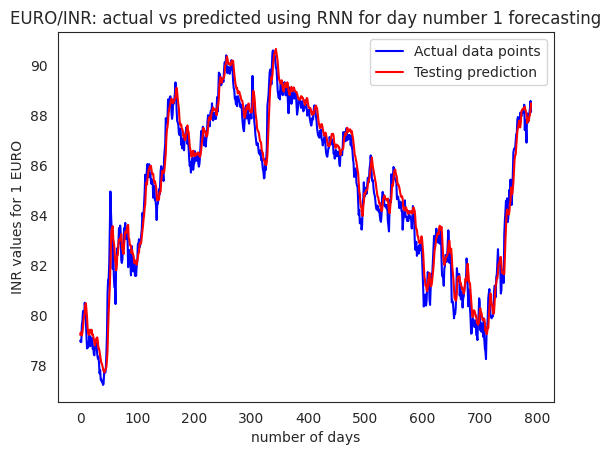

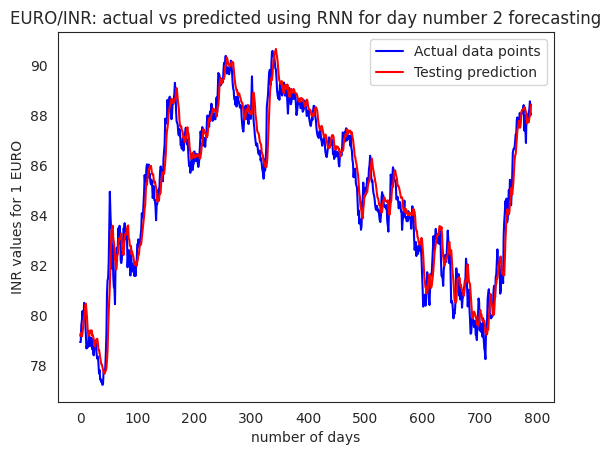

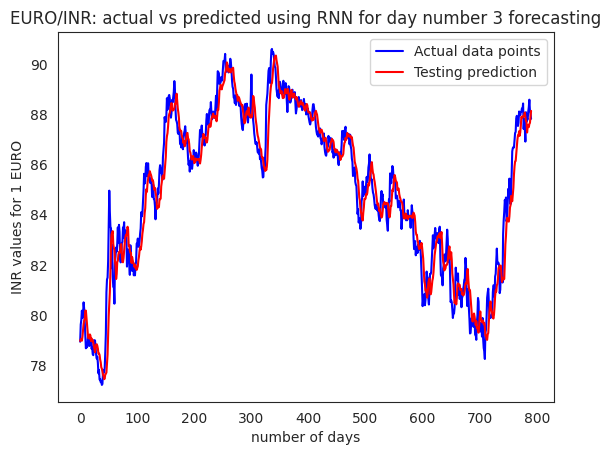

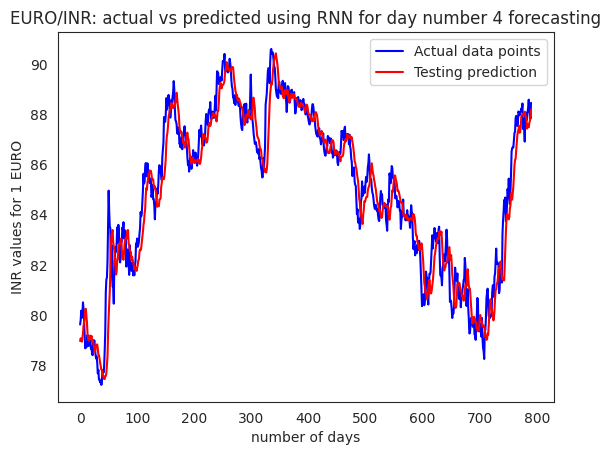

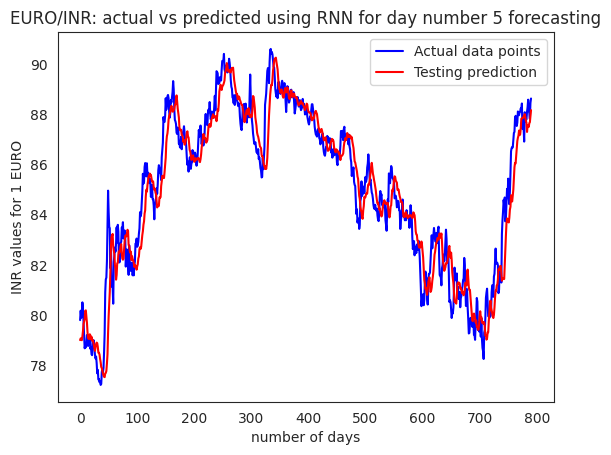

1/1 [==============================] - 0s 74ms/step
plotting the graph of forecasting for next 5 days...


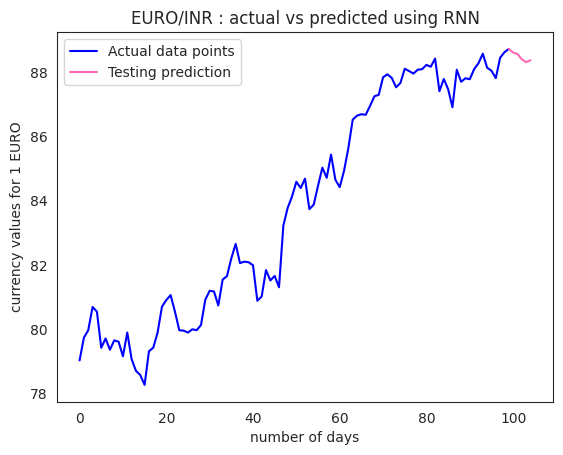

Epoch 1/50
942/942 - 2s - loss: 743.6365 - 2s/epoch - 2ms/step
Epoch 2/50
942/942 - 1s - loss: 2.7591 - 1s/epoch - 1ms/step
Epoch 3/50
942/942 - 1s - loss: 2.8121 - 1s/epoch - 1ms/step
Epoch 4/50
942/942 - 1s - loss: 2.7202 - 1s/epoch - 1ms/step
Epoch 5/50
942/942 - 1s - loss: 2.7456 - 1s/epoch - 1ms/step
Epoch 6/50
942/942 - 1s - loss: 2.8395 - 1s/epoch - 1ms/step
Epoch 7/50
942/942 - 1s - loss: 2.7020 - 1s/epoch - 1ms/step
Epoch 8/50
942/942 - 2s - loss: 2.9890 - 2s/epoch - 2ms/step
Epoch 9/50
942/942 - 2s - loss: 2.6268 - 2s/epoch - 2ms/step
Epoch 10/50
942/942 - 1s - loss: 2.7909 - 1s/epoch - 1ms/step
Epoch 11/50
942/942 - 1s - loss: 2.7079 - 1s/epoch - 1ms/step
Epoch 12/50
942/942 - 1s - loss: 2.5895 - 1s/epoch - 1ms/step
Epoch 13/50
942/942 - 1s - loss: 2.5098 - 1s/epoch - 1ms/step
Epoch 14/50
942/942 - 1s - loss: 2.3993 - 1s/epoch - 1ms/step
Epoch 15/50
942/942 - 1s - loss: 2.4658 - 1s/epoch - 1ms/step
Epoch 16/50
942/942 - 1s - loss: 2.3035 - 1s/epoch - 1ms/step
Epoch 17/50
942

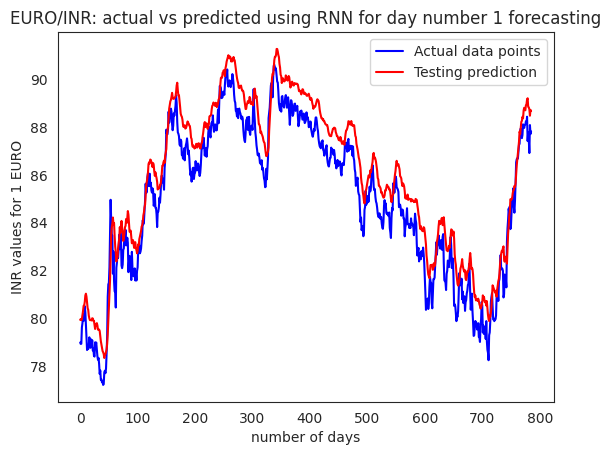

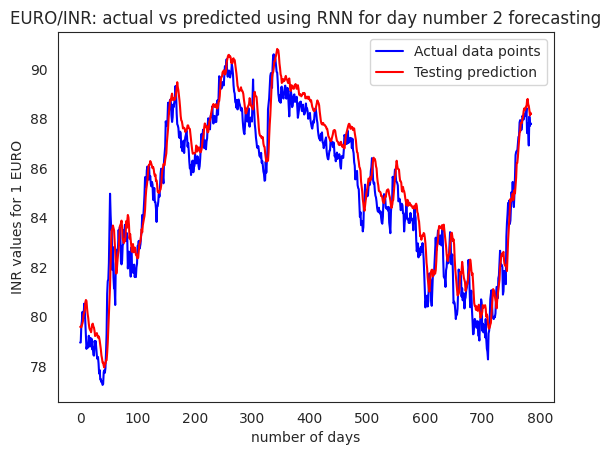

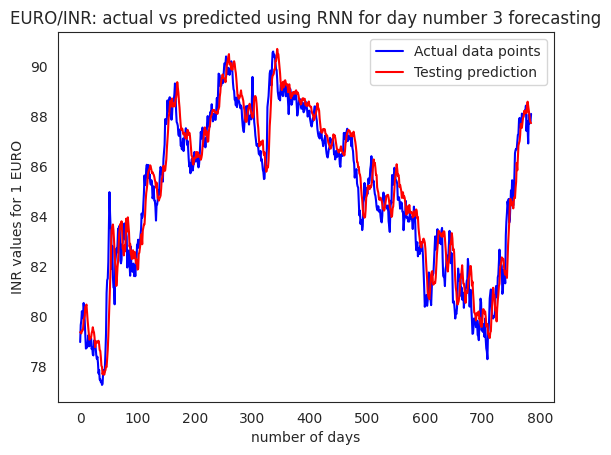

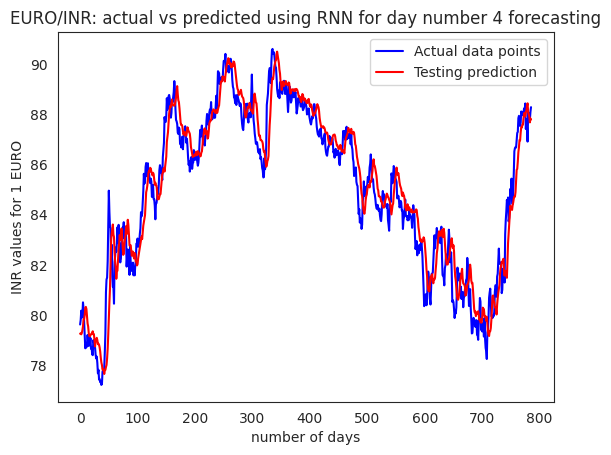

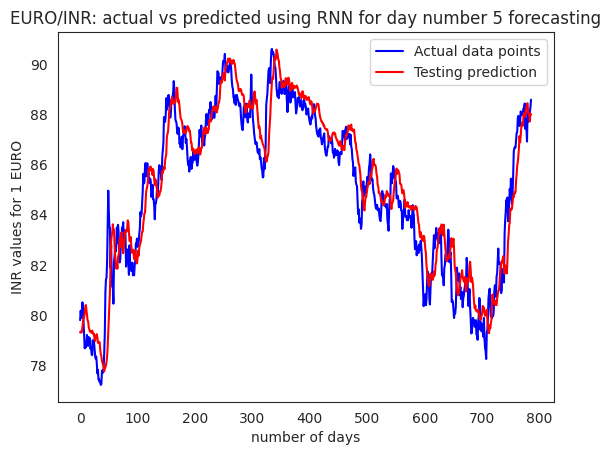

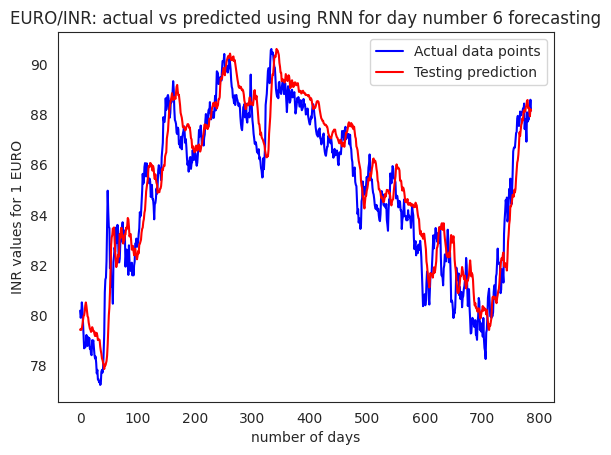

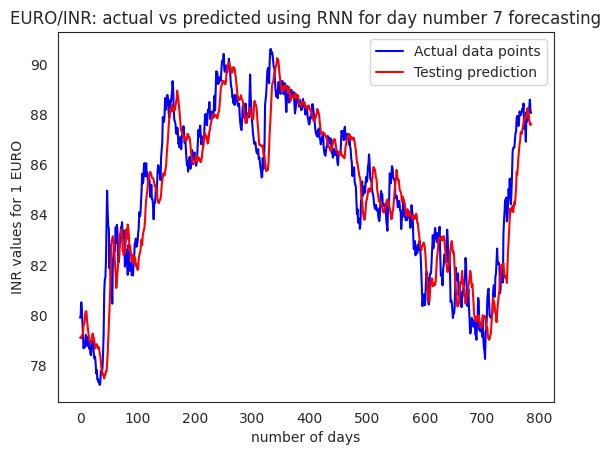

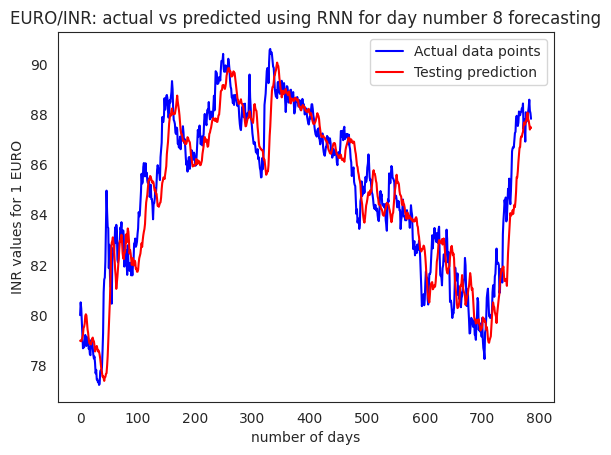

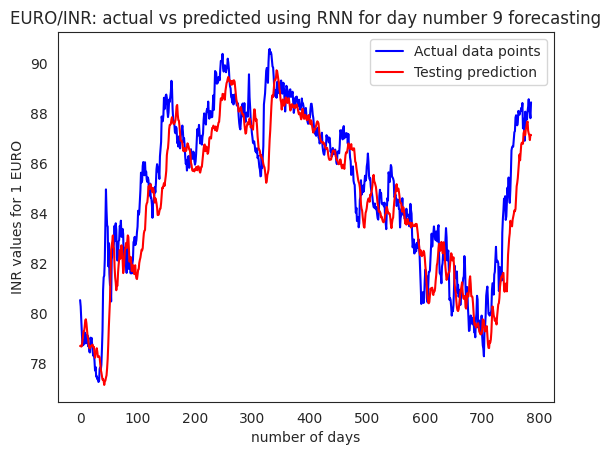

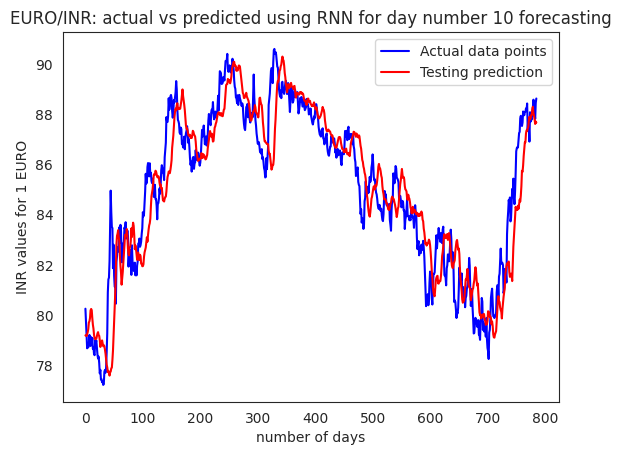

1/1 [==============================] - 0s 39ms/step
plotting the graph of forecasting for next 10 days...


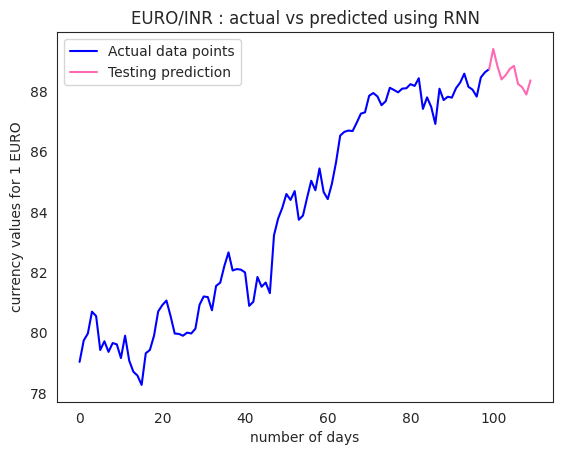

Epoch 1/50
940/940 - 2s - loss: 203.8579 - 2s/epoch - 2ms/step
Epoch 2/50
940/940 - 1s - loss: 4.7718 - 1s/epoch - 1ms/step
Epoch 3/50
940/940 - 1s - loss: 4.7654 - 1s/epoch - 2ms/step
Epoch 4/50
940/940 - 2s - loss: 4.4169 - 2s/epoch - 2ms/step
Epoch 5/50
940/940 - 2s - loss: 4.0082 - 2s/epoch - 2ms/step
Epoch 6/50
940/940 - 1s - loss: 3.8670 - 1s/epoch - 1ms/step
Epoch 7/50
940/940 - 1s - loss: 3.6411 - 1s/epoch - 1ms/step
Epoch 8/50
940/940 - 1s - loss: 4.0062 - 1s/epoch - 1ms/step
Epoch 9/50
940/940 - 1s - loss: 3.5513 - 1s/epoch - 1ms/step
Epoch 10/50
940/940 - 2s - loss: 3.5156 - 2s/epoch - 2ms/step
Epoch 11/50
940/940 - 2s - loss: 3.4227 - 2s/epoch - 2ms/step
Epoch 12/50
940/940 - 1s - loss: 3.6018 - 1s/epoch - 1ms/step
Epoch 13/50
940/940 - 1s - loss: 3.1703 - 1s/epoch - 1ms/step
Epoch 14/50
940/940 - 1s - loss: 3.2561 - 1s/epoch - 1ms/step
Epoch 15/50
940/940 - 1s - loss: 3.2411 - 1s/epoch - 1ms/step
Epoch 16/50
940/940 - 1s - loss: 3.1819 - 1s/epoch - 1ms/step
Epoch 17/50
940

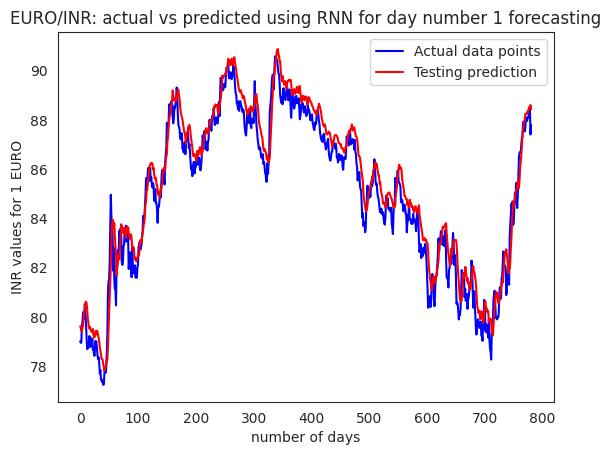

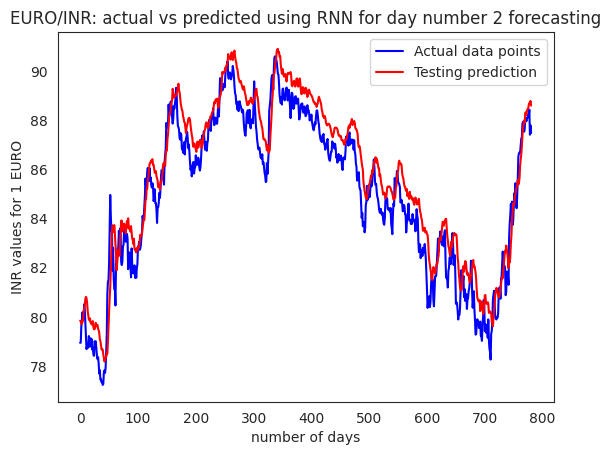

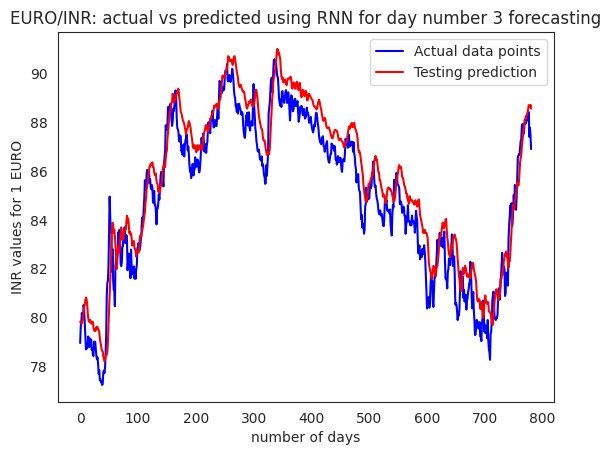

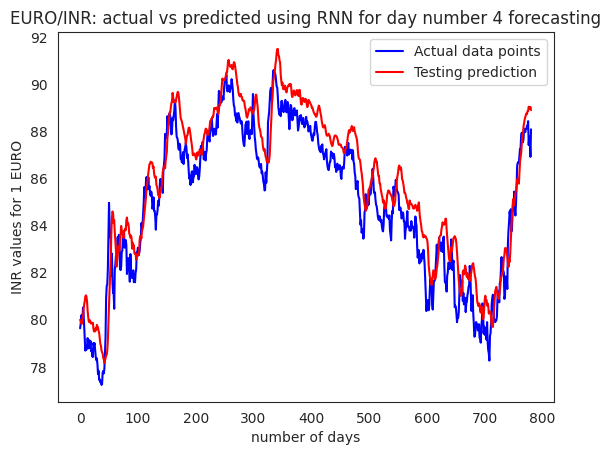

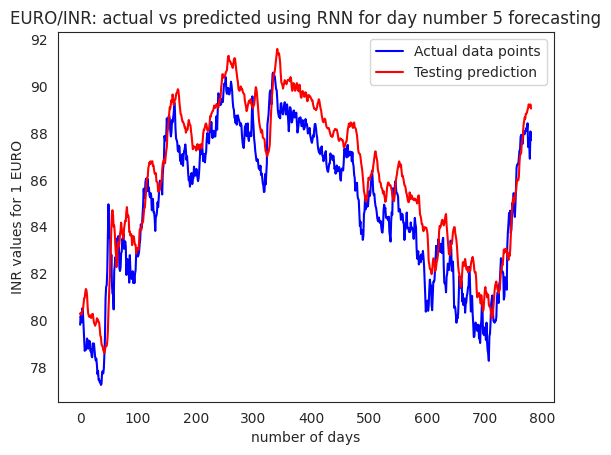

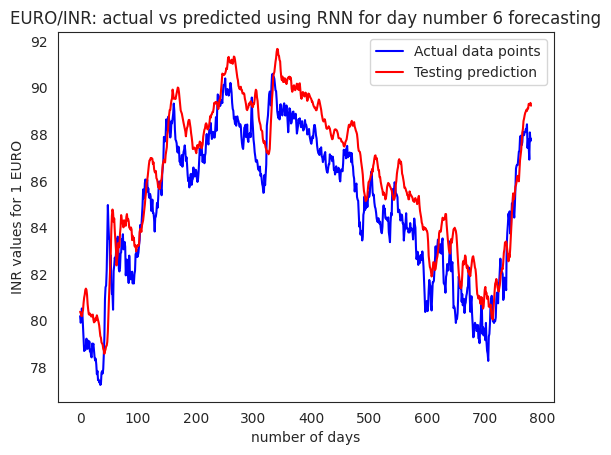

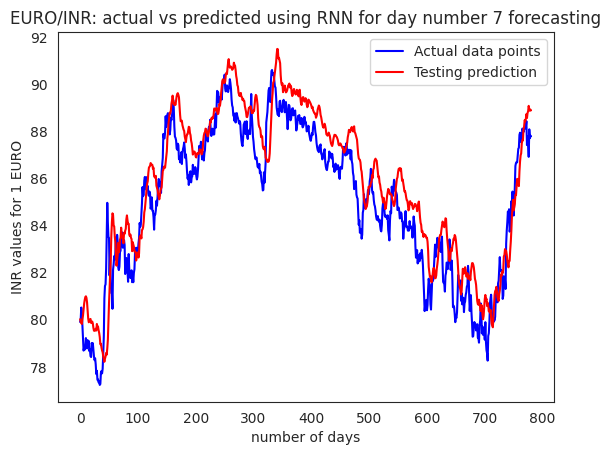

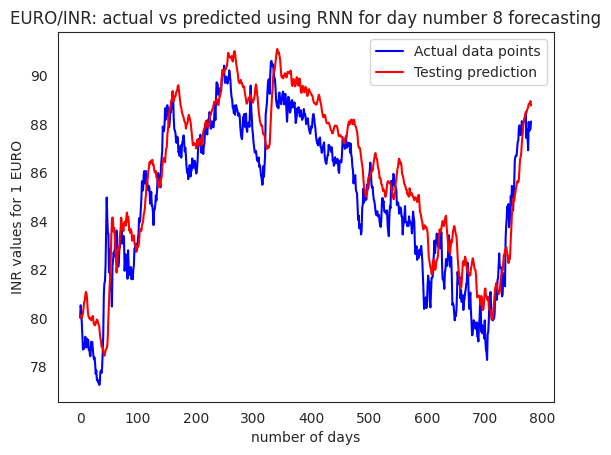

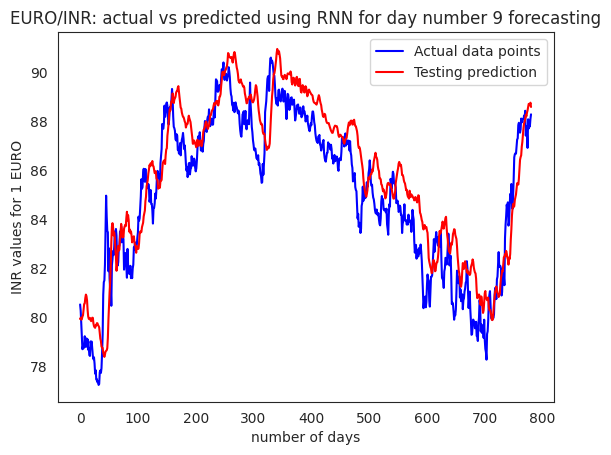

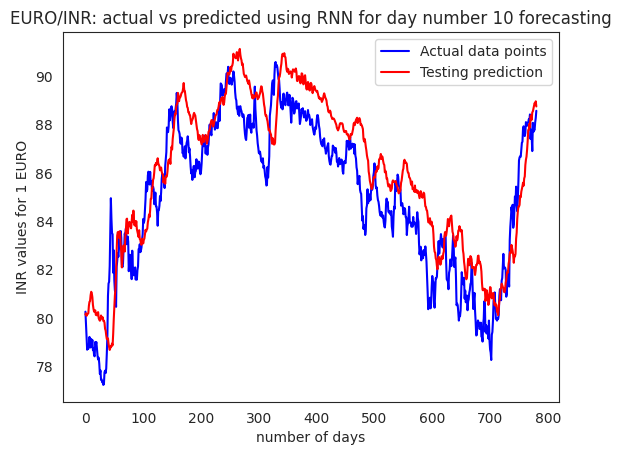

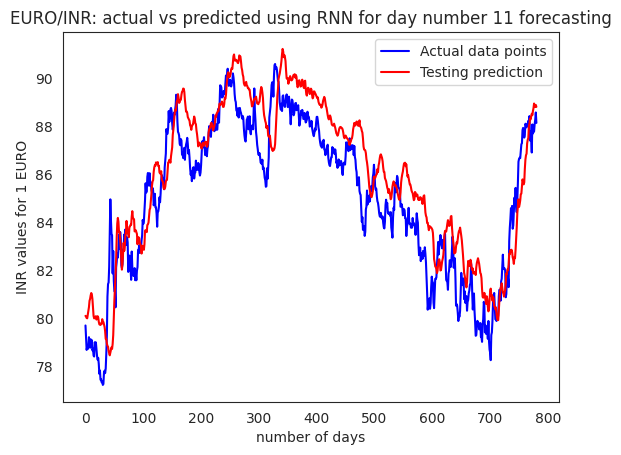

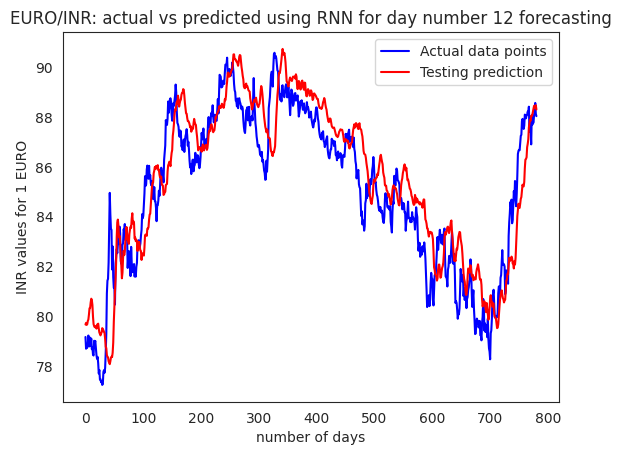

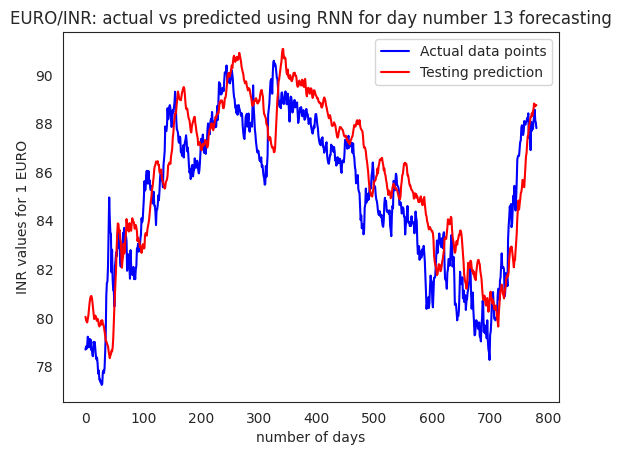

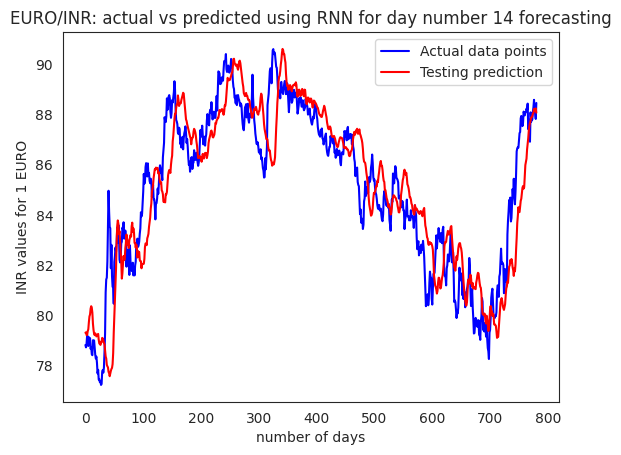

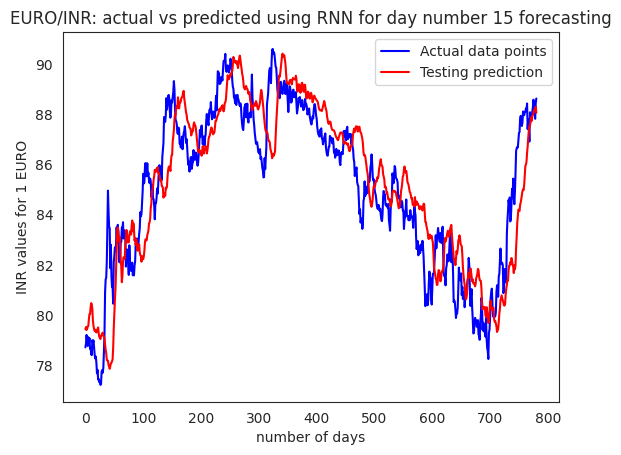

1/1 [==============================] - 0s 73ms/step
plotting the graph of forecasting for next 15 days...


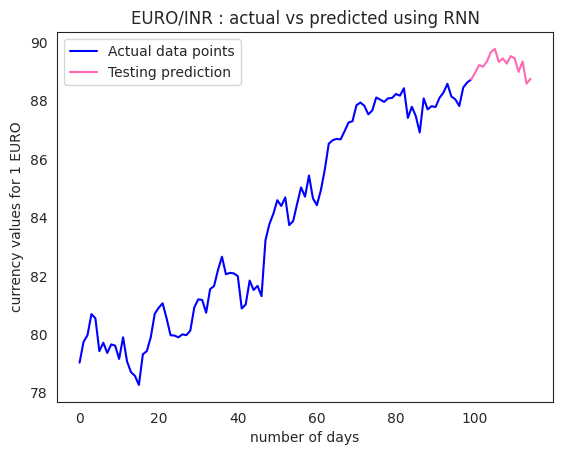

Epoch 1/50
937/937 - 2s - loss: 213.8010 - 2s/epoch - 3ms/step
Epoch 2/50
937/937 - 1s - loss: 5.0942 - 1s/epoch - 1ms/step
Epoch 3/50
937/937 - 1s - loss: 5.0345 - 1s/epoch - 1ms/step
Epoch 4/50
937/937 - 1s - loss: 4.7588 - 1s/epoch - 1ms/step
Epoch 5/50
937/937 - 1s - loss: 4.6550 - 1s/epoch - 1ms/step
Epoch 6/50
937/937 - 1s - loss: 4.7539 - 1s/epoch - 1ms/step
Epoch 7/50
937/937 - 1s - loss: 4.5861 - 1s/epoch - 1ms/step
Epoch 8/50
937/937 - 1s - loss: 4.2839 - 1s/epoch - 1ms/step
Epoch 9/50
937/937 - 2s - loss: 4.3703 - 2s/epoch - 2ms/step
Epoch 10/50
937/937 - 2s - loss: 4.0663 - 2s/epoch - 2ms/step
Epoch 11/50
937/937 - 1s - loss: 3.9521 - 1s/epoch - 1ms/step
Epoch 12/50
937/937 - 1s - loss: 4.1341 - 1s/epoch - 1ms/step
Epoch 13/50
937/937 - 1s - loss: 4.1055 - 1s/epoch - 1ms/step
Epoch 14/50
937/937 - 1s - loss: 3.6968 - 1s/epoch - 1ms/step
Epoch 15/50
937/937 - 1s - loss: 3.9009 - 1s/epoch - 1ms/step
Epoch 16/50
937/937 - 1s - loss: 3.6738 - 1s/epoch - 1ms/step
Epoch 17/50
937

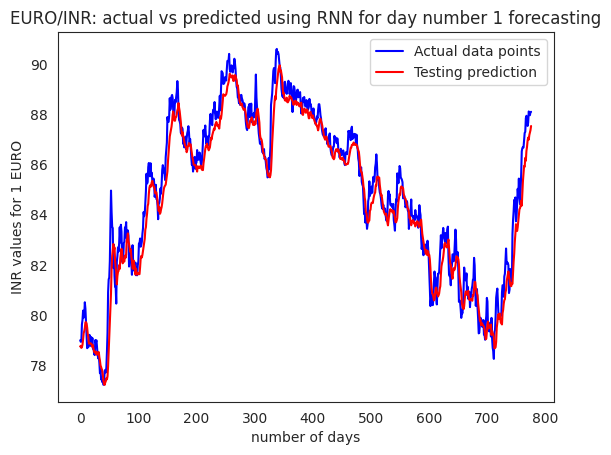

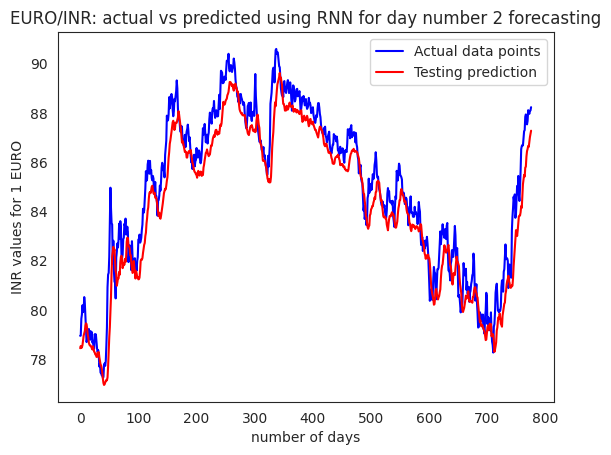

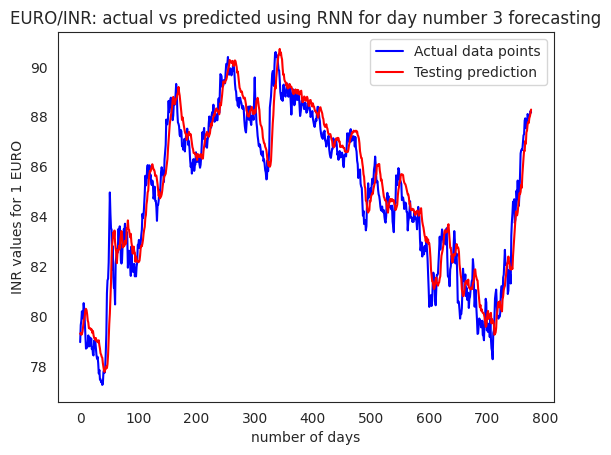

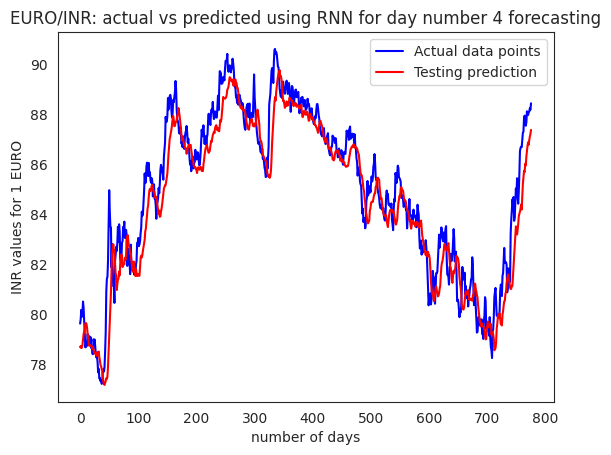

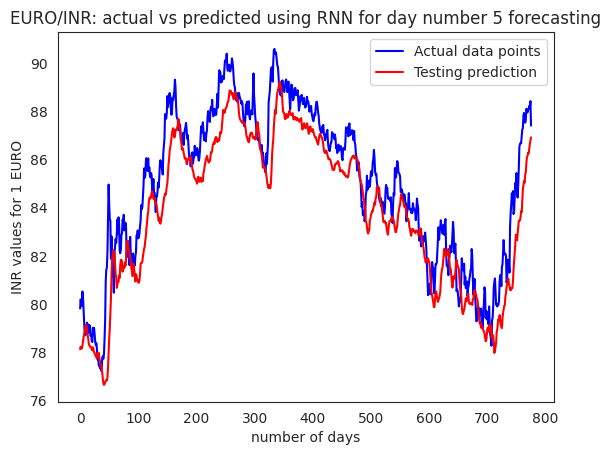

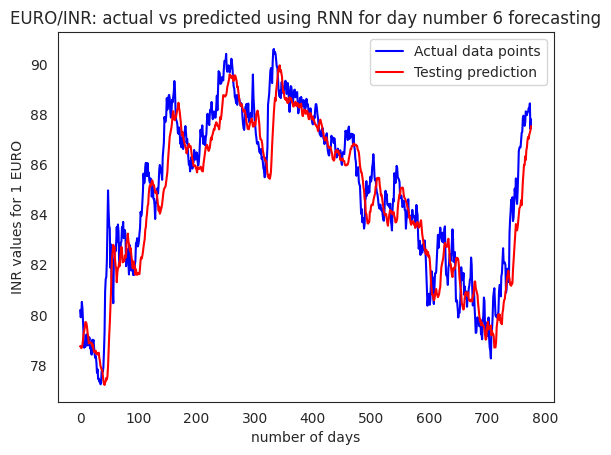

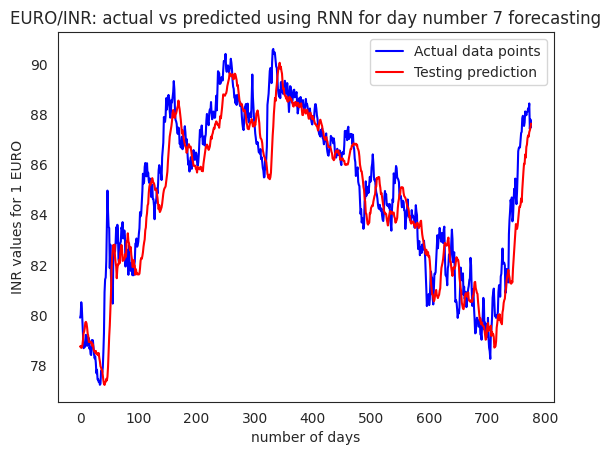

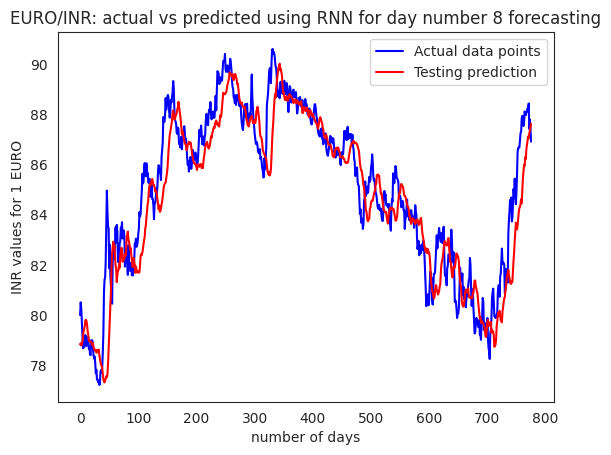

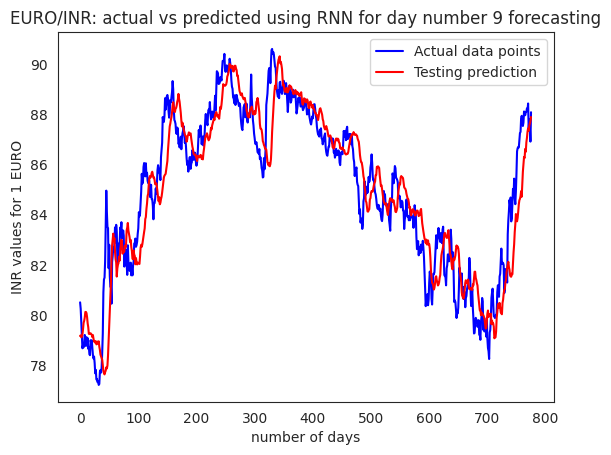

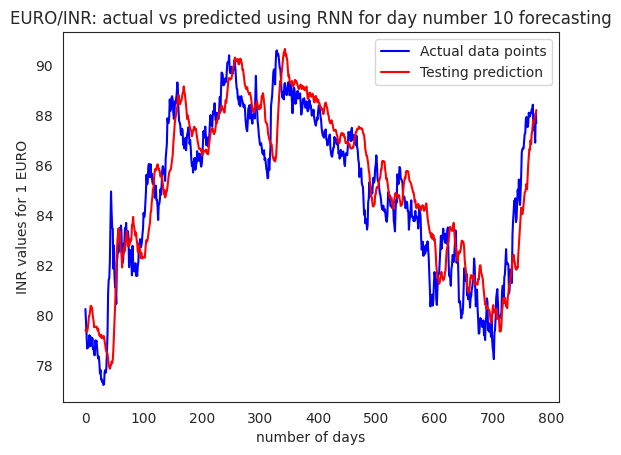

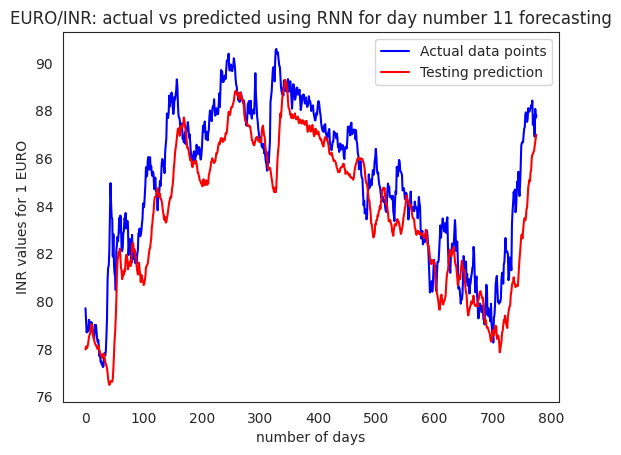

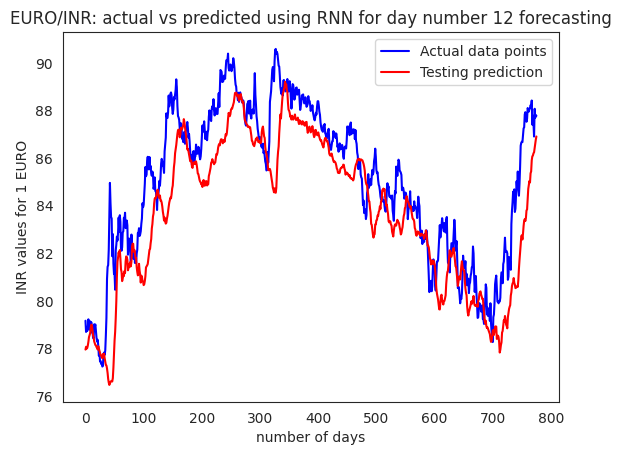

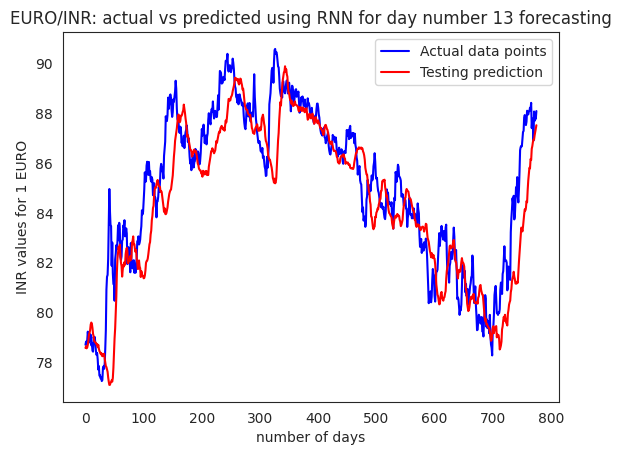

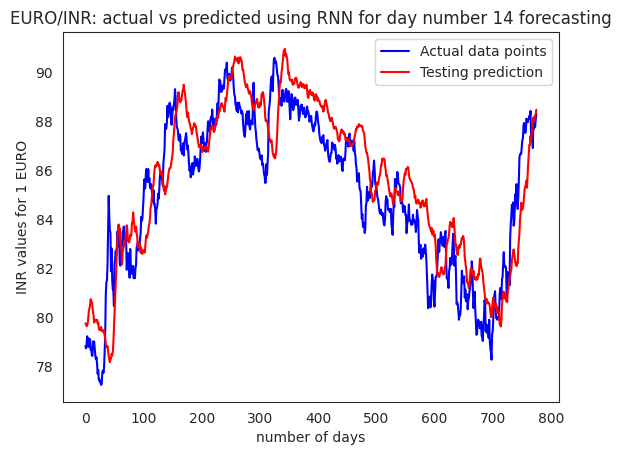

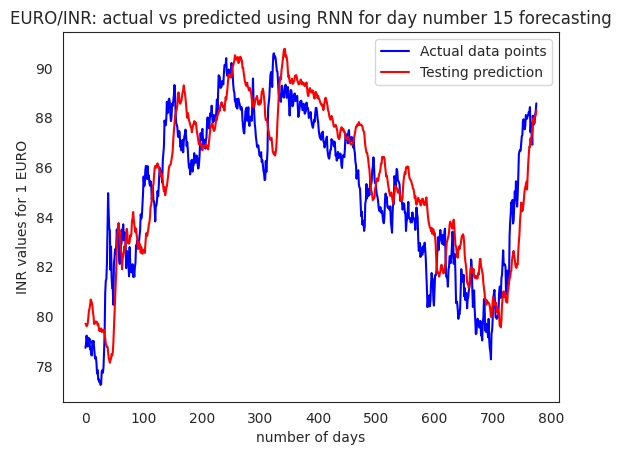

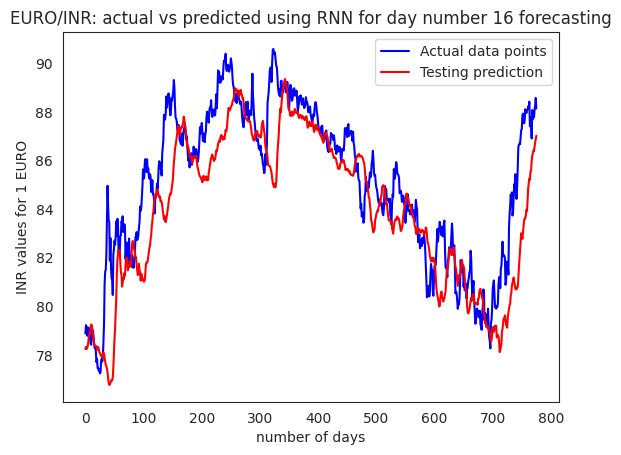

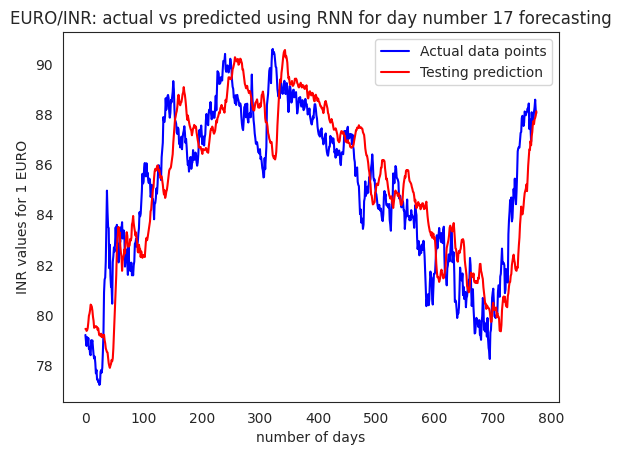

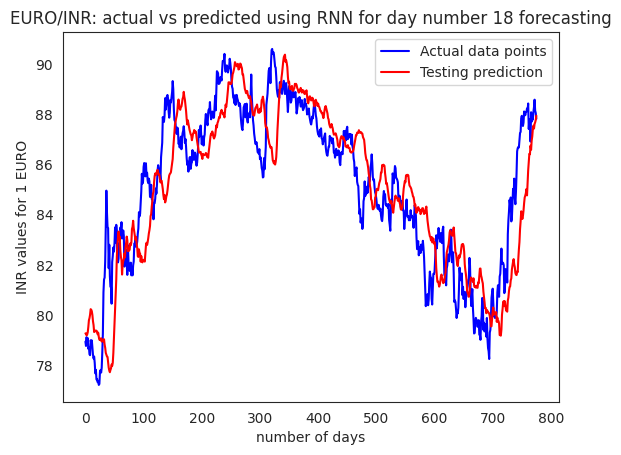

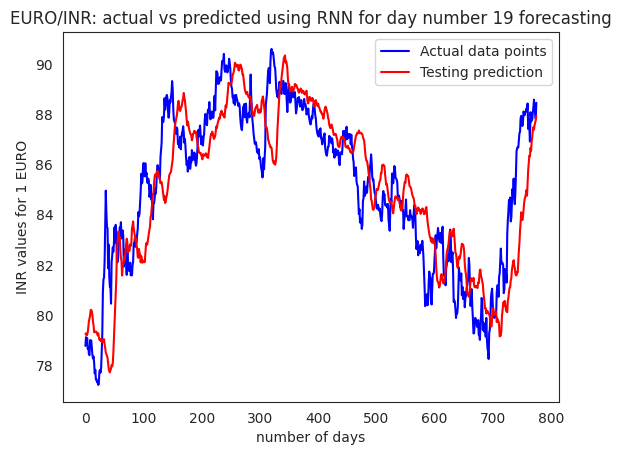

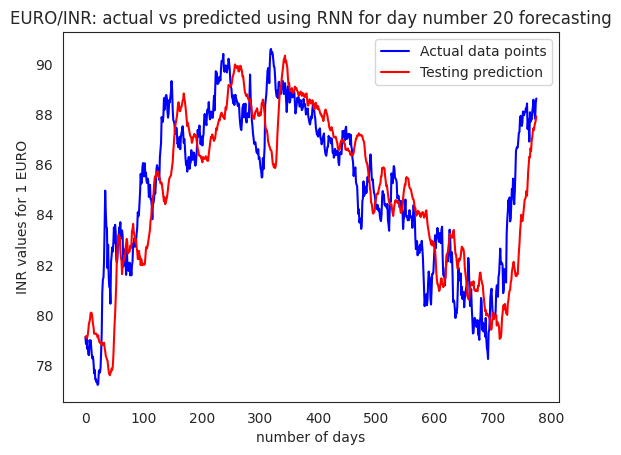

1/1 [==============================] - 0s 43ms/step
plotting the graph of forecasting for next 20 days...


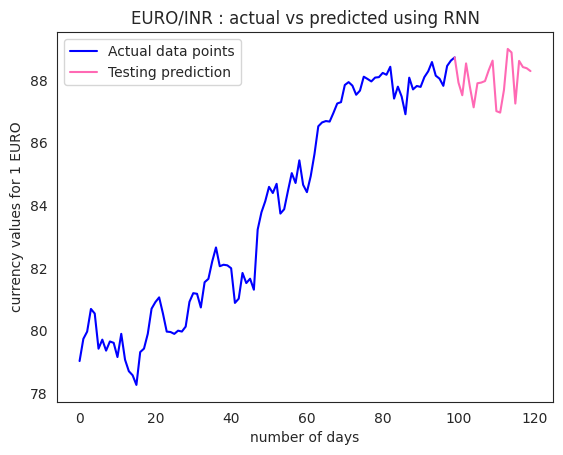

<Figure size 640x480 with 0 Axes>

In [ ]:
NUMBER_OF_PREDICTED_DATA_POINTS_LIST = [5,10,15,20]
for i in NUMBER_OF_PREDICTED_DATA_POINTS_LIST:
  rnn_pred(i)

In [ ]:
def plot_compare(observed_test_data, testing_predict, file_name, testing_predict_arima):
    actual_data = observed_test_data
    testing_data_rnn = [testing_predict[i][0] for i in range(len(testing_predict))] + testing_predict[-1][1:].tolist()
    testing_data_arima = testing_predict_arima[30:-1]

    actual = plt.plot(actual_data, label="Actual data points", color="blue")
    testing_r = plt.plot(testing_data_rnn, label="Testing prediction using RNN", color="red")
    testing_a = plt.plot(testing_data_arima, label="Testing prediction using ARIMA", color="green")

    plt.ylabel('INR values for 1 EURO')
    plt.xlabel('number of days')
    plt.title(f'EURO/INR: actual vs predicted using RNN & ARIMA')

    plt.legend()
    plt.show()
    plt.savefig(file_name)
    plt.clf()

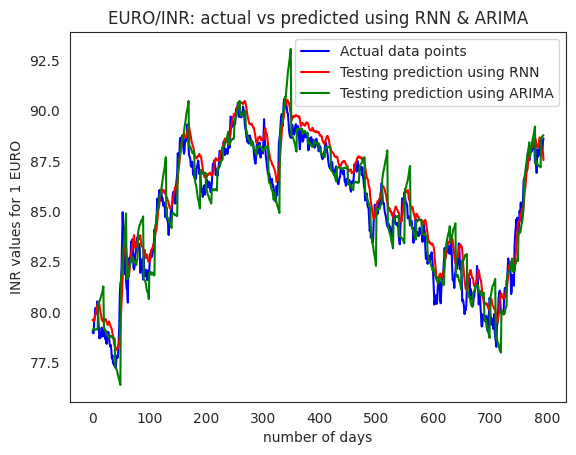

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_compare(observed_test_data, testing_predict, "testing_prediction_comparison.pdf", testing_predict_arima)